**Imports**

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & ML
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


**Data Loading**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SahilBansari/CODSOFT/refs/heads/main/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Finding null values**

In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Dropping Unnecessary Columns**

In [4]:
# Drop irrelevant or high-missing columns
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


**Handling Missing Values**

In [5]:
#fixing missing values
df.fillna({
    'Age': df['Age'].median(),
    'Fare': df['Fare'].median(),
    'Embarked': df['Embarked'].mode()[0]
}, inplace=True)

**Data Encoding**

In [6]:
# Encode Sex and Embarked
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # female=0, male=1
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2


**Data Visualisation**

**a.Survival count by Gender**

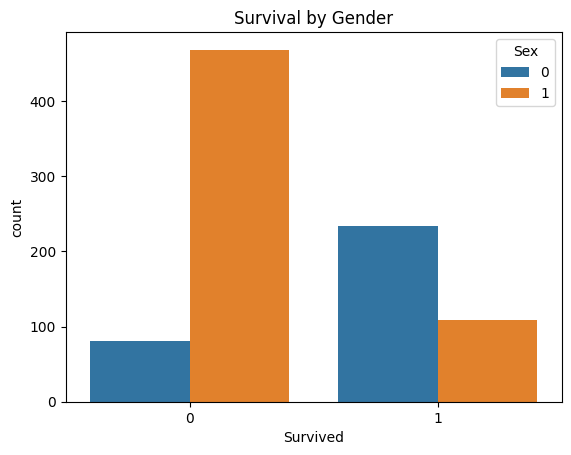

In [7]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

Females had a much higher survival rate than males.

**b. Fare vs Survival**

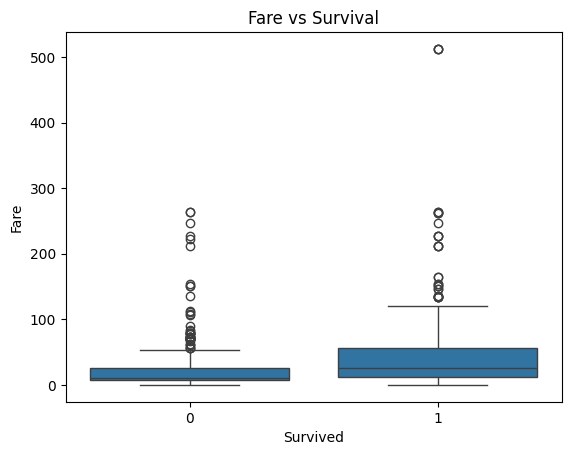

In [10]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()


Survivors generally paid higher fares.

**c.Survival by Pclass**

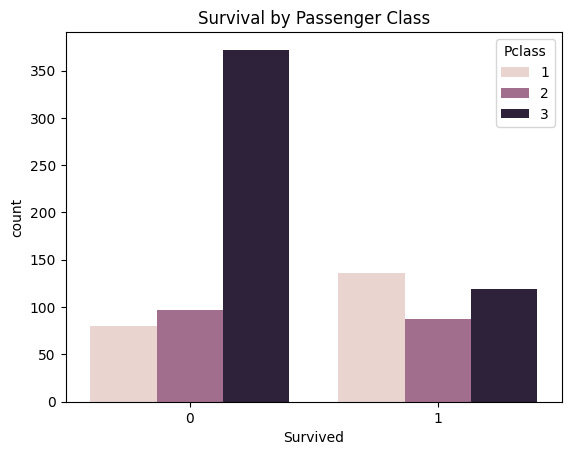

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()


1st class passengers had highest survival, 3rd class the lowest.

**d. Age Distribution**

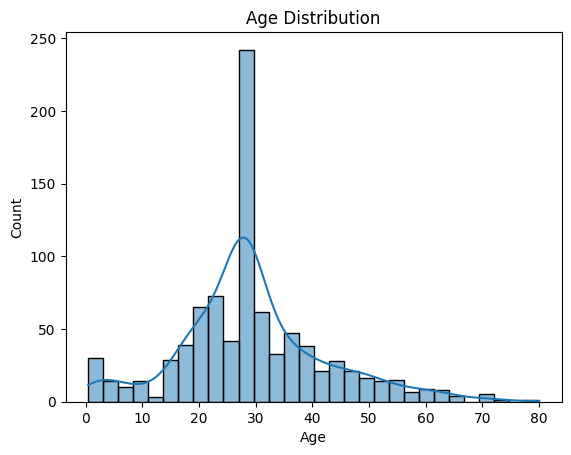

In [22]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


Age is distributed normally but has many values in children-young adult range.

Survivors include a chunk of younger passengers.

**Data Splitting**

In [12]:
selected_features = ['Pclass', 'Sex', 'Age']
X = df[selected_features]
y = df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Training the models**

a. Logistic Regression

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

b.Random Forest classifer

In [14]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

c. XG boost

In [15]:
# Initialize and train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:31:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

**Testing Models**

In [16]:
# Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)

# Random Forest
y_pred_rfc = rfc.predict(X_test)

# XG boost
y_pred_xgb = xgb.predict(X_test)



**Performance Evaluation**

A. Logistic Regression

In [17]:
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Evaluation:
Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



B. Random Forest Classifier


In [18]:
print(" Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))

 Random Forest Evaluation:
Accuracy: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



C. XG boost

In [19]:
print(" XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


 XGBoost Evaluation:
Accuracy: 0.8379888268156425
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



**Model Comparison**

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Store performance metrics
model_metrics = []

models = {
    "Logistic Regression": y_pred_logreg,
    "Random Forest": y_pred_rfc,
    "XGBoost": y_pred_xgb
}

for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    model_metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics)
metrics_df.sort_values(by="F1 Score", ascending=False, inplace=True)
metrics_df.reset_index(drop=True, inplace=True)
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,XGBoost,0.837989,0.826087,0.770270,0.797203
1,Logistic Regression,0.804469,0.791045,0.716216,0.751773
2,Random Forest,0.793296,0.776119,0.702703,0.737589


**Making Predictions Based on User Inputs**

Based on the evaluation , XGB(Lowest F1 score) model is used to make predictions.

In [21]:
def get_user_input():
    print("\n Enter minimal passenger details for survival prediction:")

    # Essential inputs only
    Pclass = int(input("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd): "))
    Sex = input("Sex (male/female): ").strip().lower()
    Age = float(input("Age (in years): "))

    # Encoding
    sex_encoded = 1 if Sex == "male" else 0

    # Create DataFrame for prediction
    user_df = pd.DataFrame([{
        'Pclass': Pclass,
        'Sex': sex_encoded,
        'Age': Age
    }])

    return user_df


# Collect input
user_input_df = get_user_input()

# Predict using XGBoost
prediction = xgb.predict(user_input_df)[0]

#  Show result
print("\n Prediction Result using XGBoost:")
if prediction == 1:
    print(" The passenger would have survived.")
else:
   print("The passenger would have not survived.")



 Enter minimal passenger details for survival prediction:
Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd): 1
Sex (male/female): m
Age (in years): 30

 Prediction Result using XGBoost:
 The passenger would have survived.
